In [8]:
#Load some stuff
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
import numpy as np
from lmfit import Minimizer, Parameters
from lmfit.lineshapes import gaussian
from lmfit.printfuncs import report_fit
from scipy import stats
import lmfit
import math
import csv

In [9]:
def gaus(mu=0,sigma=1,x1=2,x2=10): 
    # calculate the z-transform
    z1 = ( x1 - mu ) / sigma
    z2 = ( x2 - mu ) / sigma
    x = np.arange(z1, z2, 0.001)
    x_all = np.arange(-10, 10, 0.001)
    y =  stats.norm.pdf(x,mu,sigma)
    y2 = stats.norm.pdf(x_all,mu,sigma)
    return x,y,x_all,y2

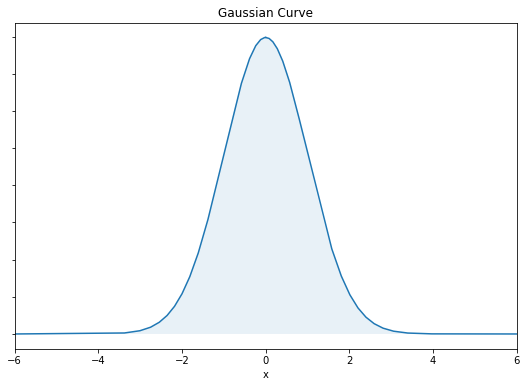

In [10]:
# build the plot
x,y,x_all,y2=gaus(0,1,10,11)
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
ax.set_title('Gaussian Curve')
#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

Z: 2 p: 0.022750131948179195


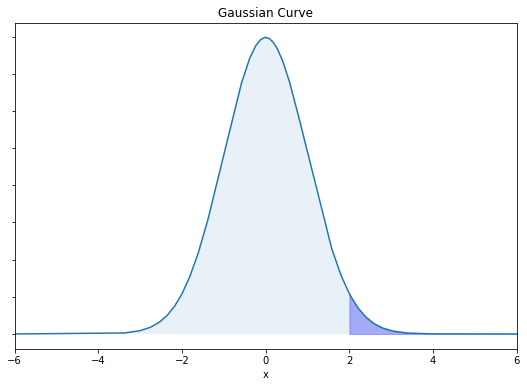

In [11]:
#Now lets say we have a measurement at x1=2
z=2
p_values = stats.norm.sf(abs(z))
print("Z:",z,"p:",p_values)
# build the plot
x,y,x_all,y2=gaus(0,1,z,10)
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
ax.set_title('Gaussian Curve')
plt.show()

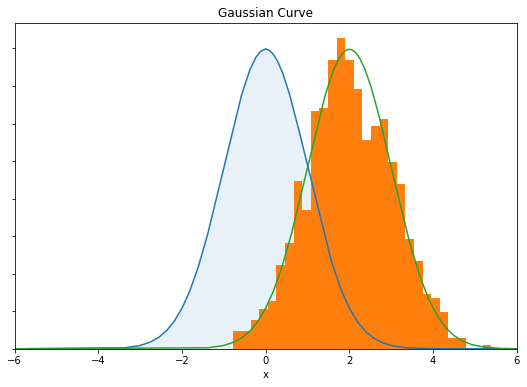

In [12]:
#now what if we measure 1000 times
z=2
samples = np.random.normal(z,1, 1000)
x,y,x_all,y2=gaus(0,1,z,10)
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(x_all,y2)
count, bins, ignored = plt.hist(samples, 30, density=True)
xs,ys,xs_all,ys_all=gaus(z,1,z,10)
ax.plot(xs_all,ys_all)
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
ax.set_title('Gaussian Curve')
plt.show()

In [13]:
#a frequentist would say the data is king, is
print(samples.mean(),samples.mean()/math.sqrt(len(samples)),samples.std(),samples.std()/math.sqrt(len(samples)))

2.0104664671714922 0.06357653195654055 1.0262557643725967 0.03245305677294487


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 30
    # variables        = 3
    chi-square         = 0.01706636
    reduced chi-square = 6.3209e-04
    Akaike info crit   = -218.155294
    Bayesian info crit = -213.951702
[[Variables]]
    amplitude:  1.00862256 +/- 0.02715742 (2.69%) (init = 1)
    center:     1.98888374 +/- 0.03295556 (1.66%) (init = 2)
    sigma:      1.06195721 +/- 0.03313907 (3.12%) (init = 1)
    fwhm:       2.50071807 +/- 0.07803654 (3.12%) == '2.3548200*sigma'
    height:     0.37890623 +/- 0.01019042 (2.69%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.580


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

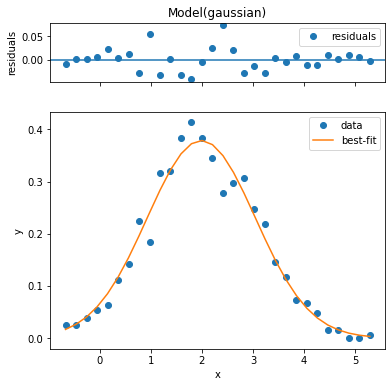

In [14]:
#with Bayesian, we hypothesize a guassian and fit it
from lmfit.models import GaussianModel
model = GaussianModel()
params = model.make_params(center=2, amplitude=1, sigma=1) 
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
result = model.fit(count, params, x=binscenters)
print(result.fit_report())
result.plot()

/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide

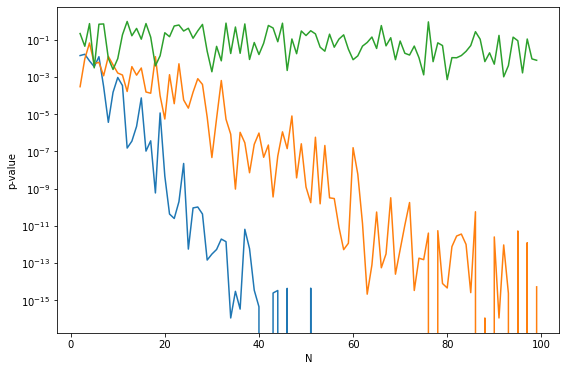

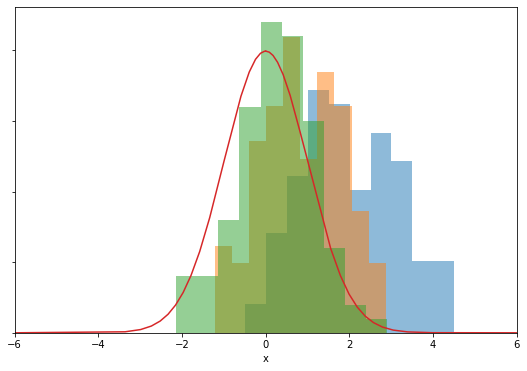

In [15]:
#but be sure to have all your nuisances
#now lets test the consistency of that our observation is consistent
def ttest(isamples):
    t = (isamples.mean()-0)/(isamples.std()/math.sqrt(len(isamples)))
    p = 1 - stats.t.cdf(t,df=len(isamples)-1)
    #print(t,p)
    return p

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(100):
    testsamples1 = np.random.normal(2,1, i0)
    pvalue = ttest(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = ttest(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(0.2,1, i0)
    pvalue = ttest(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1)
ax.plot(xvals,pvalues2)
ax.plot(xvals,pvalues3)
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
count1, bins1, ignored = plt.hist(testsamples1, 10, density=True,alpha=0.5)
count2, bins2, ignored = plt.hist(testsamples2, 10, density=True,alpha=0.5)
count3, bins3, ignored = plt.hist(testsamples3, 10, density=True,alpha=0.5)
ax.plot(x_all,y2)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
plt.show()

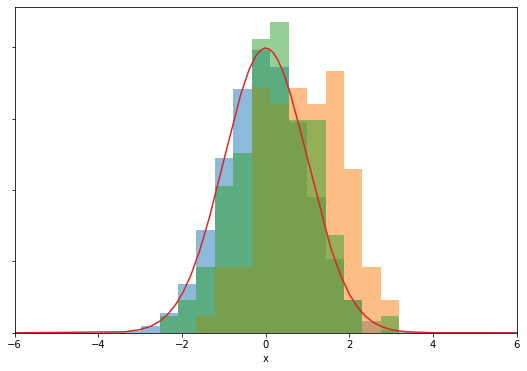

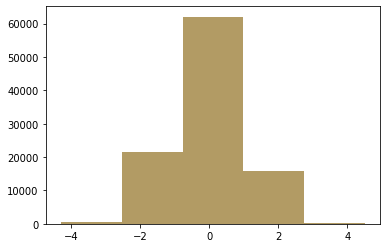

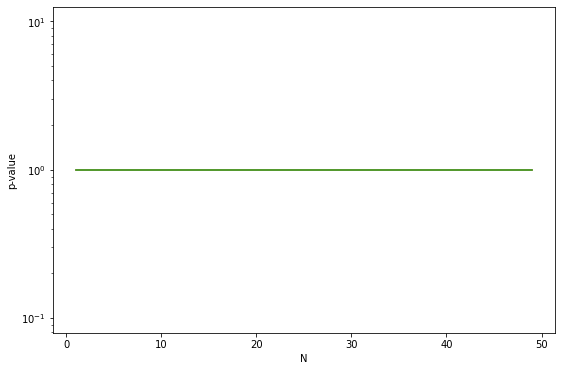

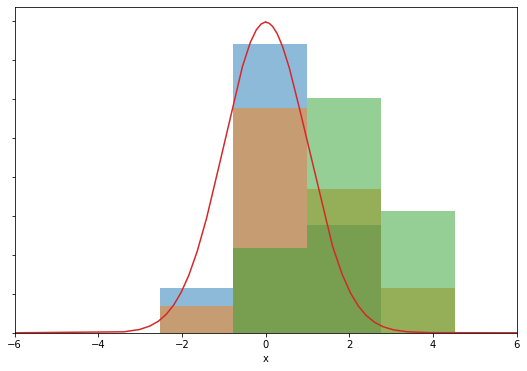

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
samples = np.random.normal(0,1, 100000)
count1, bins1, ignored = plt.hist(samples, 20, density=True,alpha=0.5)
count2, bins2, ignored = plt.hist(testsamples2, bins=bins1, density=True,alpha=0.5)
count3, bins3, ignored = plt.hist(testsamples3, bins=bins1, density=True,alpha=0.5)
ax.plot(x_all,y2)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
plt.show()

#stats.chisquare(count2*len(count2),count1*len(count2)).pvalue
def chi2test(isamples,isamplesbase=samples):
    count1, bins1, ignored = plt.hist(isamplesbase, 5, density=False,alpha=0.5)
    count2, bins2, ignored = plt.hist(isamples, bins=bins1, density=False,alpha=0.5)
    chi2=0
    for i0 in range(len(bins1)-1):
        if count2[i0] > 0:
            chi2+=(count1[i0]-count2[i0])*(count1[i0]-count2[i0])/count2[i0]
    p=stats.chi2.cdf(chi2, len(isamples))
    #print(count1,count2)    
    #p=stats.chisquare(count2*len(isamples),count1*len(isamples)).pvalue
    #print(p)
    return p


xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = chi2test(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = chi2test(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = chi2test(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)
count1, bins1, ignored = plt.hist(samples, 5, density=True,alpha=0.5)
plt.show()
    
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues3)
ax.plot(xvals,pvalues2)
ax.plot(xvals,pvalues1)
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
count1, binsX, ignored = plt.hist(testsamples1, bins=bins1, density=True,alpha=0.5)
count2, bins2, ignored = plt.hist(testsamples2, bins=bins1, density=True,alpha=0.5)
count3, bins3, ignored = plt.hist(testsamples3, bins=bins1, density=True,alpha=0.5)
ax.plot(x_all,y2)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
plt.show()



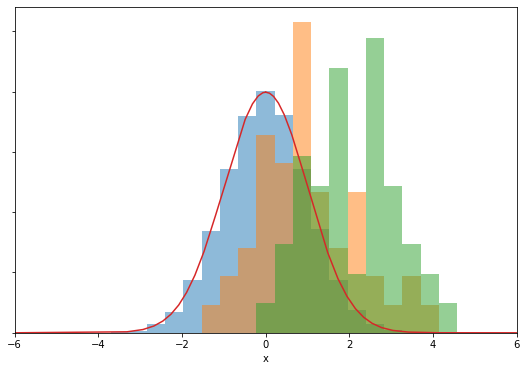

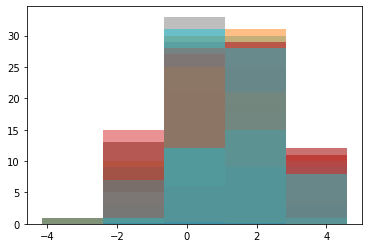

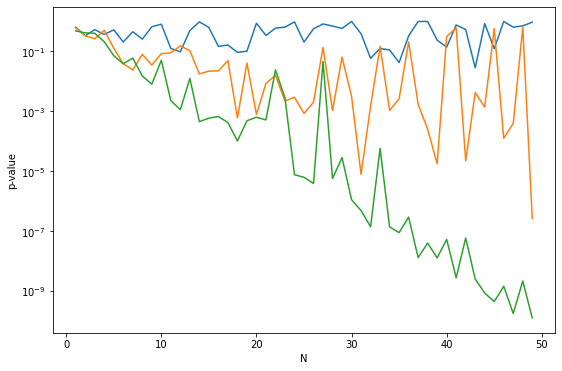

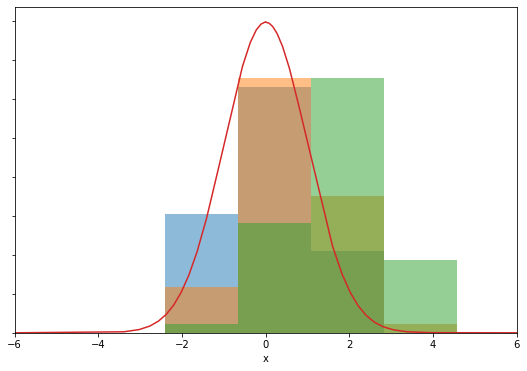

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
samples = np.random.normal(0,1, 100000)
count1, bins1, ignored = plt.hist(samples, 20, density=True,alpha=0.5)
count2, bins2, ignored = plt.hist(testsamples2, bins=bins1, density=True,alpha=0.5)
count3, bins3, ignored = plt.hist(testsamples3, bins=bins1, density=True,alpha=0.5)
ax.plot(x_all,y2)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
plt.show()

#stats.chisquare(count2*len(count2),count1*len(count2)).pvalue
def chi2test(isamples,isamplesbase=samples):
    count1, bins1, ignored = plt.hist(isamplesbase, 5, density=True,alpha=0.5)
    count2, bins2, ignored = plt.hist(isamples, bins=bins1, density=False,alpha=0.5)
    chi2=0
    for i0 in range(len(bins1)-1):
        if count2[i0] > 0:
            chi2+=(count1[i0]*len(isamples)-count2[i0])*(count1[i0]*len(isamples)-count2[i0])/count2[i0]
    p=stats.chi2.cdf(chi2, len(isamples))
    #print(count1,count2)    
    #p=stats.chisquare(count2*len(isamples),count1*len(isamples)).pvalue
    #print(p)
    return p


xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = chi2test(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = chi2test(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = chi2test(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)
count1, bins1, ignored = plt.hist(samples, 5, density=True,alpha=0.5)
plt.show()
    
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues3)
ax.plot(xvals,pvalues2)
ax.plot(xvals,pvalues1)
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
count1, binsX, ignored = plt.hist(testsamples1, bins=bins1, density=True,alpha=0.5)
count2, bins2, ignored = plt.hist(testsamples2, bins=bins1, density=True,alpha=0.5)
count3, bins3, ignored = plt.hist(testsamples3, bins=bins1, density=True,alpha=0.5)
ax.plot(x_all,y2)
ax.set_xlim([-6,6])
ax.set_xlabel('x')
ax.set_yticklabels([])
plt.show()



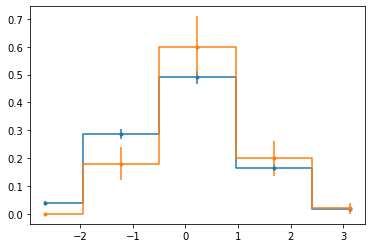

In [20]:
testsamples0 = np.random.normal(0  ,1, 1000)
testsamples1 = np.random.normal(0.2,1, 50)

y0, bin_edges = np.histogram(testsamples0, bins=5)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(testsamples0)
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')


y1, bin_edges = np.histogram(testsamples1, bins=bin_edges)
norm1=len(testsamples1)
plt.errorbar(bin_centers,y1/norm1,yerr=y1**0.5/norm1,marker='.',drawstyle = 'steps-mid')

plt.show()

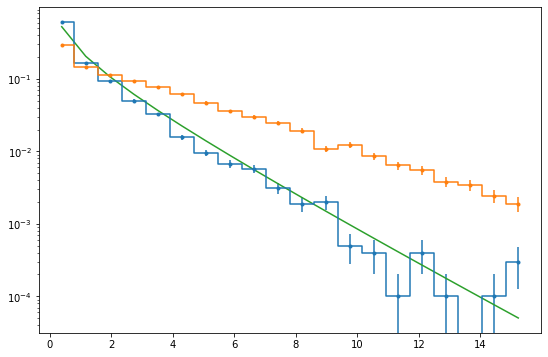

In [21]:
#Now lets run a simulation to see if Wilk's theorem is true
#Lets define the log likelihood is the simplest way possible (assume we don't know math)
#note we will use -1 to compute these on the fly
def loglikelihoodGaus(isample,mu0=-1,sigma0=-1):
    n=len(isample)
    if mu0 == -1:
        mu0=isample.mean()
    if sigma0 == -1:
        sigmahat=(isample-mu0)**2/len(isample)
        sigmahat=sum(sigmahat)
    val=-n/2*(np.log(2*math.pi*sigmahat)+1)
    return val

ntoys=10000
deltaLL1=[]
for i0 in range(ntoys):
    testsamples1 = np.random.normal(0.,1, 50)
    hypoth=loglikelihoodGaus(testsamples1,0)
    null  =loglikelihoodGaus(testsamples1)
    val=hypoth-null
    deltaLL1.append(-2*val)

deltaLL2=[]
for i0 in range(ntoys):
    testsamples1 = np.random.normal(0.2,1, 50)
    hypoth=loglikelihoodGaus(testsamples1,0)
    null  =loglikelihoodGaus(testsamples1)
    val=hypoth-null
    deltaLL2.append(-2*val)

    
from scipy.special import erf
y1, bin_edges = np.histogram(deltaLL1, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
chi2 = []
for x in bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 1)
    #chi2val= erf(np.sqrt(bin_edges[x+1]))-erf(np.sqrt(bin_edges[x]))
    chi2.append(chi2val)

y2, bin_edges = np.histogram(deltaLL2, bins=bin_edges)
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/ntoys,yerr=y1**0.5/ntoys,marker='.',drawstyle = 'steps-mid')
plt.errorbar(bin_centers,y2/ntoys,yerr=y2**0.5/ntoys,marker='.',drawstyle = 'steps-mid')
plt.plot(bin_centers,chi2)
ax.set_yscale('log')
plt.show()

zero sample 5.084196755973153
0.2 sample 1.88460504799707


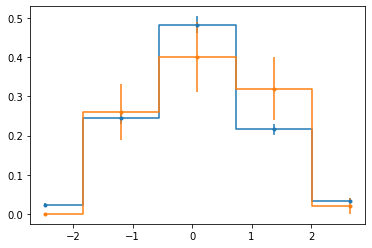

In [30]:
testsamples0 = np.random.normal(0  ,1, 1000)
testsamples1 = np.random.normal(0.2,1, 50)

hypoth=loglikelihoodGaus(testsamples0,0)
null=loglikelihoodGaus(testsamples0)
print("zero sample",-2*(hypoth-null))

hypoth=loglikelihoodGaus(testsamples1,0)
null=loglikelihoodGaus(testsamples1)
print("0.2 sample",-2*(hypoth-null))

y0, bin_edges = np.histogram(testsamples0, bins=5)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(testsamples0)
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')


y1, bin_edges = np.histogram(testsamples1, bins=bin_edges)
norm1=len(testsamples1)
plt.errorbar(bin_centers,y1/norm1,yerr=y1**0.5/norm1,marker='.',drawstyle = 'steps-mid')

plt.show()

In [28]:
1-stats.chi2.cdf(2.2, 1)

0.13801073756865545

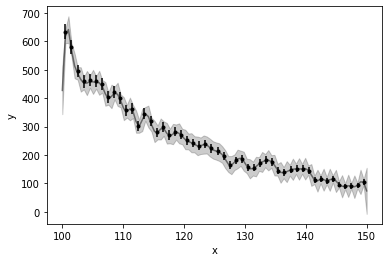

In [35]:
#Now lets load some data and do gaussian kernals with it
x = []
y = []
y_err = []
label='out_2011.txt'
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        if float(row[1]) > 150:
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        #add poisson uncertainties                                                                                                 
        y_err.append(math.sqrt(float(row[2])))

import george
from george import kernels
kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
#kernel = np.var(y) * kernels.Matern32Kernel(5.0)
#kernel = np.var(y) * kernels.ExpSine2Kernel()#gamma=0.1, period=5.0, ndim=3, axes=0)
#kernel = np.var(y) * kernels.Matern52Kernel(5.0)
#kernel = np.var(y) * kernels.ConstantKernel(log_constant=math.sqrt(1))
gp = george.GP(kernel)
gp.compute(x, y_err)

x_pred = np.linspace(100, 150, 100)
pred, pred_var = gp.predict(y, x_pred, return_var=True)

plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),color="k", alpha=0.2)
plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
plt.errorbar(x, y, yerr=y_err, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y");

-24334.478937985696


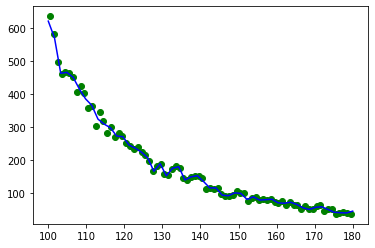

In [40]:
from scipy import interpolate
import csv
x = []
y = []
y_err = []
label='out_2011.txt'
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        x.append(float(row[1]))
        y.append(float(row[2]))
        #add poisson uncertainties                                                                                                 
        y_err.append(math.sqrt(float(row[2])))

tck = interpolate.splrep(x, y)
x2 = np.linspace(100, 180)
y2 = interpolate.splev(x2, tck)
plt.plot(x, y, 'go')
plt.plot(x2, y2, 'b')

value = interpolate.splev(90.1,tck)
print(value)
#this gives us a function that we can play with
